In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:

In [2]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig, TrainingArguments,Trainer,BertModel
from datasets import load_dataset, load_metric
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
from datasets import load_dataset, load_metric

In [3]:
from transformers import BertConfig, BertModel

# Load the existing configuration file for BERT base uncased
config = BertConfig.from_pretrained('bert-base-uncased')

In [4]:
from transformers import BertConfig

config = BertConfig(
    hidden_size=384,                  # Set the hidden size to 384
    num_attention_heads=8,            # Set the number of attention heads to 8
    num_hidden_layers=6,              # Set the number of hidden layers to 6
    intermediate_size=1536,           # Set the intermediate size to 1536
    hidden_dropout_prob=0.1,
    attention_probs_dropout_prob=0.1
)

In [5]:
# Create the model architecture for sequence classification
model = BertForSequenceClassification(config)

In [6]:
total_params = sum(p.numel() for p in model.parameters())
print("Total Parameters: ", total_params)

Total Parameters:  22713986


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Avg Train Loss: 0.6814
Epoch 1 - Train Accuracy: 56.18%
Avg Eval Loss: 0.6891
Eval Accuracy: 53.67%

Epoch 2 - Avg Train Loss: 0.6432
Epoch 2 - Train Accuracy: 63.21%
Avg Eval Loss: 0.6055
Eval Accuracy: 68.58%

Epoch 3 - Avg Train Loss: 0.5443
Epoch 3 - Train Accuracy: 72.49%
Avg Eval Loss: 0.5271
Eval Accuracy: 74.54%

Epoch 4 - Avg Train Loss: 0.4744
Epoch 4 - Train Accuracy: 77.50%
Avg Eval Loss: 0.4990
Eval Accuracy: 75.46%

Epoch 5 - Avg Train Loss: 0.4231
Epoch 5 - Train Accuracy: 80.59%
Avg Eval Loss: 0.4824
Eval Accuracy: 76.72%

Epoch 6 - Avg Train Loss: 0.3854
Epoch 6 - Train Accuracy: 83.00%
Avg Eval Loss: 0.4808
Eval Accuracy: 77.52%

Epoch 7 - Avg Train Loss: 0.3547
Epoch 7 - Train Accuracy: 84.65%
Avg Eval Loss: 0.4688
Eval Accuracy: 79.82%

Epoch 8 - Avg Train Loss: 0.3308
Epoch 8 - Train Accuracy: 86.10%
Avg Eval Loss: 0.4660
Eval Accuracy: 80.28%

Epoch 9 - Avg Train Loss: 0.3114
Epoch 9 - Train Accuracy: 87.16%
Avg Eval Loss: 0.5102
Eval Accuracy: 79.93%

E

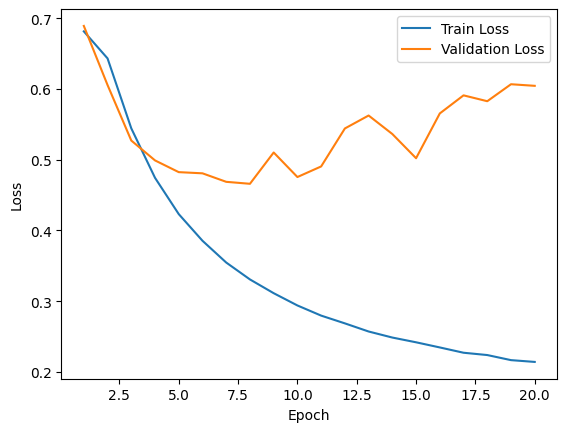

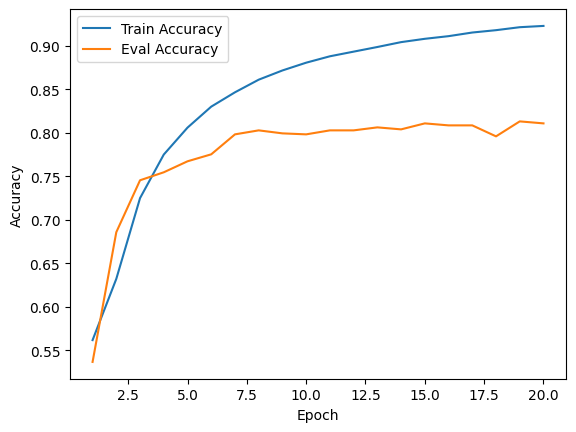

In [8]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer, BertForMaskedLM
from datasets import load_dataset
from transformers import BertTokenizer
from datasets import load_dataset, Dataset
from torch.nn.utils import clip_grad_norm_

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset = load_dataset('glue', 'sst2')

train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

train_dataset = train_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

val_dataset = val_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)


config = BertConfig(
    hidden_size=384,                  # Set the hidden size to 384
    num_attention_heads=8,            # Set the number of attention heads to 8
    num_hidden_layers=6,              # Set the number of hidden layers to 6
    intermediate_size=1536,           # Set the intermediate size to 1536
    hidden_dropout_prob=0.1,
    attention_probs_dropout_prob=0.1
)

# Create the smaller BERT model
model = BertForMaskedLM(config)

# Create the model architecture for sequence classification
model = BertForSequenceClassification(config)

train_encodings = tokenizer(train_dataset["sentence"], truncation=True, padding=True)
train_labels = train_dataset["label"]

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings["input_ids"]),
    torch.tensor(train_encodings["attention_mask"]),
    torch.tensor(train_labels)
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=1e-5)

# Fine-tune the model
model.train()
train_losses = []
val_losses = []
train_accuracies = []
eval_accuracies = []

for epoch in range(20):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()

        # Apply gradient clipping
        clip_grad_norm_(model.parameters(), max_norm=1.0)  # Set the max_norm value as desired

        optimizer.step()

        _, predicted_labels = torch.max(outputs.logits, dim=1)
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracy = total_correct / total_samples
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1} - Avg Train Loss: {avg_train_loss:.4f}")
    print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2%}")

    eval_encodings = tokenizer(val_dataset["sentence"], truncation=True, padding=True)
    eval_labels = val_dataset["label"]

    eval_dataset = torch.utils.data.TensorDataset(
        torch.tensor(eval_encodings["input_ids"]),
        torch.tensor(eval_encodings["attention_mask"]),
        torch.tensor(eval_labels)
    )
    eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

    model.eval()
    total_eval_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()

            _, predicted_labels = torch.max(outputs.logits, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    avg_eval_loss = total_eval_loss / len(eval_dataloader)
    val_losses.append(avg_eval_loss)
    eval_accuracy = total_correct / total_samples
    eval_accuracies.append(eval_accuracy)

    print("Avg Eval Loss: {:.4f}".format(avg_eval_loss))
    print("Eval Accuracy: {:.2%}".format(eval_accuracy))
    print()

# Plotting the train and validation loss per epoch
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the train and validation accuracy per epoch
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(eval_accuracies)+1), eval_accuracies, label='Eval Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Save the fine-tuned model
model.save_pretrained('fine_tuned_model_8_6_384_1536')
tokenizer.save_pretrained('fine_tuned_model_8_6_384_1536')

('fine_tuned_model_8_6_384_1536/tokenizer_config.json',
 'fine_tuned_model_8_6_384_1536/special_tokens_map.json',
 'fine_tuned_model_8_6_384_1536/vocab.txt',
 'fine_tuned_model_8_6_384_1536/added_tokens.json')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Avg Train Loss: 0.6808
Epoch 1 - Train Accuracy: 56.48%
Avg Eval Loss: 0.6882
Eval Accuracy: 53.67%

Epoch 2 - Avg Train Loss: 0.6374
Epoch 2 - Train Accuracy: 63.83%
Avg Eval Loss: 0.5972
Eval Accuracy: 69.15%

Epoch 3 - Avg Train Loss: 0.5336
Epoch 3 - Train Accuracy: 73.38%
Avg Eval Loss: 0.5283
Eval Accuracy: 74.89%

Epoch 4 - Avg Train Loss: 0.4640
Epoch 4 - Train Accuracy: 78.17%
Avg Eval Loss: 0.5021
Eval Accuracy: 77.29%

Epoch 5 - Avg Train Loss: 0.4170
Epoch 5 - Train Accuracy: 81.03%
Avg Eval Loss: 0.4946
Eval Accuracy: 78.44%

Epoch 6 - Avg Train Loss: 0.3802
Epoch 6 - Train Accuracy: 83.18%
Avg Eval Loss: 0.5136
Eval Accuracy: 77.75%

Epoch 7 - Avg Train Loss: 0.3519
Epoch 7 - Train Accuracy: 84.82%
Avg Eval Loss: 0.5497
Eval Accuracy: 77.18%

Epoch 8 - Avg Train Loss: 0.3283
Epoch 8 - Train Accuracy: 86.09%
Avg Eval Loss: 0.4918
Eval Accuracy: 79.59%

Epoch 9 - Avg Train Loss: 0.3091
Epoch 9 - Train Accuracy: 87.21%
Avg Eval Loss: 0.5303
Eval Accuracy: 79.13%

E

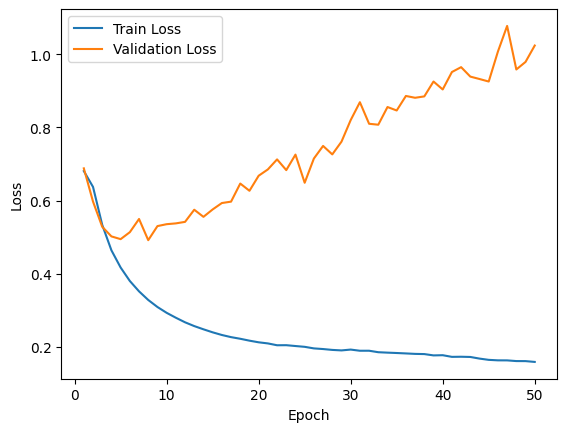

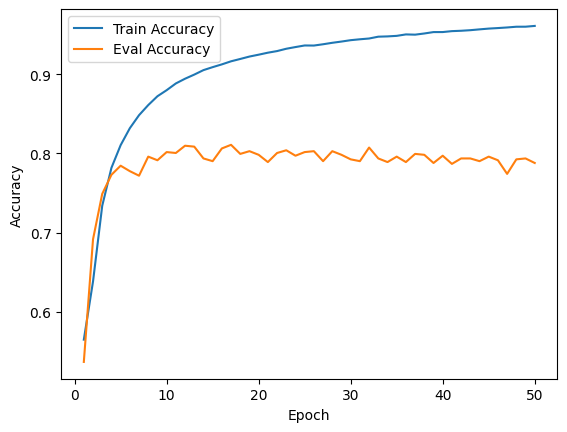

In [10]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer, BertForMaskedLM
from datasets import load_dataset
from transformers import BertTokenizer
from datasets import load_dataset, Dataset
from torch.nn.utils import clip_grad_norm_

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset = load_dataset('glue', 'sst2')

train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

train_dataset = train_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

val_dataset = val_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)


config = BertConfig(
    hidden_size=384,                  # Set the hidden size to 384
    num_attention_heads=8,            # Set the number of attention heads to 8
    num_hidden_layers=6,              # Set the number of hidden layers to 6
    intermediate_size=1536,           # Set the intermediate size to 1536
    hidden_dropout_prob=0.1,
    attention_probs_dropout_prob=0.1
)

# Create the smaller BERT model
model = BertForMaskedLM(config)

# Create the model architecture for sequence classification
model = BertForSequenceClassification(config)

train_encodings = tokenizer(train_dataset["sentence"], truncation=True, padding=True)
train_labels = train_dataset["label"]

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings["input_ids"]),
    torch.tensor(train_encodings["attention_mask"]),
    torch.tensor(train_labels)
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=1e-5)

# Fine-tune the model
model.train()
train_losses = []
val_losses = []
train_accuracies = []
eval_accuracies = []

for epoch in range(50):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()

        # Apply gradient clipping
        clip_grad_norm_(model.parameters(), max_norm=1.0)  # Set the max_norm value as desired

        optimizer.step()

        _, predicted_labels = torch.max(outputs.logits, dim=1)
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracy = total_correct / total_samples
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1} - Avg Train Loss: {avg_train_loss:.4f}")
    print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2%}")

    eval_encodings = tokenizer(val_dataset["sentence"], truncation=True, padding=True)
    eval_labels = val_dataset["label"]

    eval_dataset = torch.utils.data.TensorDataset(
        torch.tensor(eval_encodings["input_ids"]),
        torch.tensor(eval_encodings["attention_mask"]),
        torch.tensor(eval_labels)
    )
    eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

    model.eval()
    total_eval_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()

            _, predicted_labels = torch.max(outputs.logits, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    avg_eval_loss = total_eval_loss / len(eval_dataloader)
    val_losses.append(avg_eval_loss)
    eval_accuracy = total_correct / total_samples
    eval_accuracies.append(eval_accuracy)

    print("Avg Eval Loss: {:.4f}".format(avg_eval_loss))
    print("Eval Accuracy: {:.2%}".format(eval_accuracy))
    print()

# Plotting the train and validation loss per epoch
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the train and validation accuracy per epoch
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(eval_accuracies)+1), eval_accuracies, label='Eval Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# Save the fine-tuned model
model.save_pretrained('fine_tuned_model_1536')
tokenizer.save_pretrained('fine_tuned_model_1536')

('fine_tuned_model_1536/tokenizer_config.json',
 'fine_tuned_model_1536/special_tokens_map.json',
 'fine_tuned_model_1536/vocab.txt',
 'fine_tuned_model_1536/added_tokens.json')